# **Project 1: Integration of Mergesort & Insertion Sort**

### **1. Introduction**

In this project, we aim to improve the efficiency of the traditional Mergesort algorithm by integrating it with Insertion Sort
- **Problem:** Mergesort has a time complexity of $O(n \log n)$ and performs well on large datasets. However, when subarrays become very small, the repeated recursive calls introduce significant overhead, making the algorithm less efficient in practice.

- **Solution:** Insertion Sort, despite its worst-case $O(n^2)$ complexity, is simple and effective for small inputs due to its low overhead. By introducing a threshold value S, the algorithm switches from Mergesort to Insertion Sort whenever a subarray size is less than or equal to S.

- **Outcome:** This hybrid approach reduces unnecessary recursion and improves practical performance while maintaining the asymptotic efficiency of Mergesort on larger datasets.

### **2. Algorithm Design**
can put diagram of how it works

### **3. Implementation**


In [21]:
def merge(array, low, mid, high):
    left_half  = array[low : mid + 1]
    right_half = array[mid + 1 : high + 1]

    i = j = 0
    k = low
    comparisons = 0

    # compare while both halves have elements
    while i < len(left_half) and j < len(right_half):
        comparisons += 1  # one key comparison
        if left_half[i] <= right_half[j]:  # <= keeps stability
            array[k] = left_half[i]
            i += 1
        else:
            array[k] = right_half[j]
            j += 1
        k += 1

    # dump leftovers (no comparisons counted here)
    while i < len(left_half):
        array[k] = left_half[i]
        i += 1; k += 1

    while j < len(right_half):
        array[k] = right_half[j]
        j += 1; k += 1

    return comparisons
    

In [22]:
def insertion_sort(array, low, high):
    comparisons = 0
    # start from second element in the subarray since first element would have nothing to compare with
    for i in range(low + 1, high + 1):
        # loop stops at the first element of the subarray
        for j in range(i, low, -1):
            comparisons += 1                # count comparison
            if array[j] < array[j - 1]:
                array[j], array[j - 1] = array[j - 1], array[j]
            else:
                break
    
    return comparisons

In [23]:
# splits the array in half until len <= S then send to insertion sort
# if len > S then send to merge sort
def hybrid_merge_sort(array, S, low, high):
    if low >= high:
        return 0                        # nothing to do, no comparisons
    
    # if length of array <= S
    if high - low + 1 <= S:
        return insertion_sort(array, low, high)
        
    comparisons = 0
    mid = (low + high) // 2
    comparisons += hybrid_merge_sort(array, S, low, mid)      # sort left half
    comparisons += hybrid_merge_sort(array, S, mid + 1, high) # sort right half
    comparisons += merge(array, low, mid, high)        # merge them
    
    return comparisons

In [24]:
# function to start the hybrid algorithm
def sort_list_hybrid(array, S):
    n = len(array)
    if n <= 1:
        return 0
    if n <= S:
        return insertion_sort(array, 0, n - 1)
    else:
        return hybrid_merge_sort(array, S, 0, n - 1)

### **4. Dataset Generation**

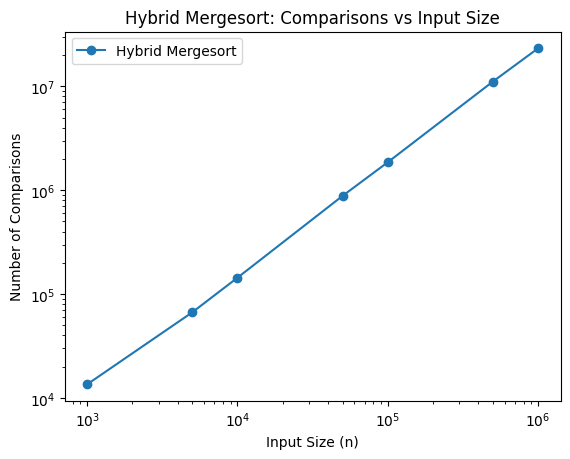

In [25]:
from numpy import random
import matplotlib.pyplot as plt

# sizes of array
n_values = [1_000, 2_000, 5_000, 10_000, 20_000, 50_000, 100_000, 200_000,
            500_000, 1_000_000, 2_000_000, 5_000_000, 10_000_000]  # stop at 1M for speed

list_of_integer_list = []
# Generate arrays with values between 1 and 1,000,000
for size in n_values:
    arr = random.randint(1, 1_000_001, size=size)
    list_of_integer_list.append(arr.tolist())

comparisons = []
for list_ in list_of_integer_list:
    comparisons.append(sort_list_hybrid(list_.copy(), S=32))

plt.plot(n_values, comparisons, marker='o', label='Hybrid Mergesort')
plt.xlabel("Input Size (n)")
plt.ylabel("Number of Comparisons")
plt.xscale("log")
plt.yscale("log")
plt.title("Hybrid Mergesort: Comparisons vs Input Size")
plt.legend()
plt.show()


### **5. Analyse**

### **6. Compare with Original Mergesort**